<a href="https://colab.research.google.com/github/Uma-dev99/Flight-Delay-Prediction/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [5]:
#reading csv file
flight_data = pd.read_csv('/content/DelayedFlights.csv')

In [ ]:
flight_data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1.0,3.0,4.0,2003.0,1955.0,2211.0,2225.0,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1.0,3.0,4.0,754.0,735.0,1002.0,1000.0,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1.0,3.0,4.0,628.0,620.0,804.0,750.0,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1.0,3.0,4.0,1829.0,1755.0,1959.0,1925.0,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1.0,3.0,4.0,1940.0,1915.0,2121.0,2110.0,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
flight_data.shape

(124408, 30)

In [ ]:
flight_data.columns


Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
flight_data = flight_data.drop(columns=['Unnamed: 0'])

In [8]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8545 entries, 0 to 8544
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               8545 non-null   int64  
 1   Month              8545 non-null   int64  
 2   DayofMonth         8545 non-null   int64  
 3   DayOfWeek          8545 non-null   int64  
 4   DepTime            8545 non-null   float64
 5   CRSDepTime         8545 non-null   int64  
 6   ArrTime            8518 non-null   float64
 7   CRSArrTime         8545 non-null   int64  
 8   UniqueCarrier      8545 non-null   object 
 9   FlightNum          8545 non-null   int64  
 10  TailNum            8545 non-null   object 
 11  ActualElapsedTime  8518 non-null   float64
 12  CRSElapsedTime     8545 non-null   float64
 13  AirTime            8518 non-null   float64
 14  ArrDelay           8518 non-null   float64
 15  DepDelay           8545 non-null   float64
 16  Origin             8545 

In [10]:
flight_data.isnull().sum()


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                27
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 0
ActualElapsedTime      27
CRSElapsedTime          0
AirTime                27
ArrDelay               27
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                 28
TaxiOut                 1
Cancelled               1
CancellationCode        1
Diverted                1
CarrierDelay         3429
WeatherDelay         3429
NASDelay             3429
SecurityDelay        3429
LateAircraftDelay    3429
dtype: int64

In [12]:
missing_percentage = (flight_data.isnull().sum() / len(flight_data)) * 100
print(missing_percentage)

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.315974
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000000
ActualElapsedTime     0.315974
CRSElapsedTime        0.000000
AirTime               0.315974
ArrDelay              0.315974
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.327677
TaxiOut               0.011703
Cancelled             0.011703
CancellationCode      0.011703
Diverted              0.011703
CarrierDelay         40.128730
WeatherDelay         40.128730
NASDelay             40.128730
SecurityDelay        40.128730
LateAircraftDelay    40.128730
dtype: float64


In [14]:
flight_data['CancellationCode'].unique()


array(['N', nan], dtype=object)

In [15]:
# Impute missing values with mean for numerical columns
numerical_columns = ['ArrTime', 'ActualElapsedTime', 'AirTime', 'ArrDelay']
for col in numerical_columns:
    flight_data[col].fillna(flight_data[col].mean(), inplace=True)

# Impute missing values with mode for categorical columns
categorical_columns = ['TaxiIn']
for col in categorical_columns:
    flight_data[col].fillna(flight_data[col].mode()[0], inplace=True)

In [17]:
flight_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,8545.0,8545.0,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,8545.000000,...,8545.000000,8545.000000,8544.000000,8544.0,8544.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000
mean,2008.0,1.0,5.134933,4.666121,1544.872557,1490.021065,1632.310402,1647.884143,1415.530720,110.621625,...,657.857461,5.083909,11.176966,0.0,0.003160,11.335809,1.507623,5.543198,0.107897,30.427873
std,0.0,0.0,1.576744,1.955151,418.707948,400.385479,518.792151,451.214951,1143.804411,58.035759,...,471.427339,3.652170,6.254601,0.0,0.056129,20.169395,11.424354,15.198198,1.182343,34.779142
min,2008.0,1.0,3.000000,1.000000,22.000000,600.000000,1.000000,5.000000,1.000000,38.000000,...,133.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.0,4.000000,4.000000,1223.000000,1200.000000,1346.000000,1350.000000,447.000000,70.000000,...,333.000000,3.000000,8.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,2008.0,1.0,5.000000,5.000000,1601.000000,1525.000000,1716.000000,1705.000000,1018.000000,90.000000,...,451.000000,4.000000,10.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.000000,20.000000
75%,2008.0,1.0,6.000000,6.000000,1906.000000,1830.000000,2026.000000,2015.000000,2359.000000,136.000000,...,866.000000,6.000000,13.000000,0.0,0.000000,15.000000,0.000000,6.000000,0.000000,40.000000
max,2008.0,1.0,8.000000,7.000000,2358.000000,2200.000000,2400.000000,2355.000000,3949.000000,372.000000,...,2363.000000,64.000000,113.000000,0.0,1.000000,285.000000,233.000000,366.000000,34.000000,434.000000


In [18]:
if flight_data['Year'].nunique() == 1:
    # Drop the 'Year' column
    flight_data.drop(columns=['Year'], inplace=True)

In [20]:
flight_data.tail()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
8540,1,8,2,2051.0,2040,2152.0,2150,WN,2285,N384SW,...,4.0,12.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
8541,1,8,2,1539.0,1515,1649.0,1625,WN,3048,N653SW,...,4.0,15.0,0.0,N,0.0,0.0,0.0,0.0,0.0,24.0
8542,1,8,2,1403.0,1345,1952.0,1950,WN,3063,N271WN,...,6.0,6.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
8543,1,8,2,2015.0,1955,2114.0,2105,WN,412,N204WN,...,3.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
8544,1,8,2,1845.0,1835,1945.0,1945,WN,1276,N732SW,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
flight_data['Month'].nunique()

1

In [24]:
flight_data=flight_data.drop(columns=['TailNum'],axis=1)

In [25]:
flight_data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [31]:
flight_data=flight_data.drop(columns=['UniqueCarrier'],axis=1)

In [33]:
corrmat = flight_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

ValueError: could not convert string to float: 'IAD'

In [34]:
flight_data['Origin'].unique()

array(['IAD', 'IND', 'ISP', 'JAN', 'JAX', 'LAS', 'LAX', 'LBB', 'LIT',
       'MAF', 'MCI', 'MCO', 'MDW', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA',
       'ONT', 'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PVD', 'RDU',
       'RNO', 'RSW', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC',
       'SMF', 'SNA', 'STL', 'TPA', 'TUL', 'TUS', 'ABQ', 'ALB', 'AMA',
       'AUS', 'BDL', 'BHM', 'BNA', 'BOI', 'BUF', 'BUR', 'BWI', 'CLE',
       'CMH', 'CRP', 'DAL', 'DEN', 'DTW', 'ELP', 'FLL', 'GEG', 'HOU',
       'HRL'], dtype=object)

In [35]:
flight_data['Dest'].unique()

array(['TPA', 'BWI', 'JAX', 'LAS', 'MCO', 'MDW', 'PHX', 'FLL', 'PBI',
       'RSW', 'HOU', 'BHM', 'BNA', 'IND', 'PHL', 'ABQ', 'ALB', 'AMA',
       'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP',
       'GEG', 'IAD', 'ISP', 'LAX', 'LBB', 'LIT', 'MAF', 'MCI', 'MHT',
       'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'ORF', 'PDX', 'PIT', 'PVD',
       'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC',
       'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'JAN', 'HRL',
       'CRP'], dtype=object)

In [41]:
identifier_columns = [ 'Month', 'DayofMonth', 'FlightNum']

# Step 2: Load the original dataset containing the 'UniqueCarrier' column
original_dataset = pd.read_csv("/content/DelayedFlights.csv")

# Step 3: Merge the original dataset with the provided dataset based on the common identifier column(s)
data_with_uniquecarrier = pd.merge(flight_data, original_dataset[['UniqueCarrier'] + identifier_columns], on=identifier_columns, how='left')

flight_data=data_with_uniquecarrier

In [50]:
flight_data

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,...,8.0,0.0,N,0.0,10.436523,1.25101,5.133954,0.099497,31.614871,WN
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,...,10.0,0.0,N,0.0,10.436523,1.25101,5.133954,0.099497,31.614871,WN
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,...,17.0,0.0,N,0.0,10.436523,1.25101,5.133954,0.099497,31.614871,WN
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,10.0,0.0,N,0.0,2.000000,0.00000,0.000000,0.000000,32.000000,WN
4,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,10.0,0.0,N,0.0,2.000000,0.00000,0.000000,0.000000,32.000000,WN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,1,8,2,1403.0,1345,1952.0,1950,3063,229.0,245.0,...,6.0,0.0,N,0.0,0.000000,1.25101,5.133954,0.099497,31.614871,WN
19053,1,8,2,1403.0,1345,1952.0,1950,3063,229.0,245.0,...,6.0,0.0,N,0.0,0.000000,1.25101,5.133954,0.099497,31.614871,WN
19054,1,8,2,2015.0,1955,2114.0,2105,412,59.0,70.0,...,8.0,0.0,N,0.0,0.000000,1.25101,5.133954,0.099497,31.614871,WN
19055,1,8,2,1845.0,1835,1945.0,1945,1276,60.0,70.0,...,NaN,NaN,NaN,NaN,0.000000,1.25101,5.133954,0.099497,31.614871,WN


In [45]:
flight_data['CarrierDelay'].fillna(flight_data['CarrierDelay'].interpolate(), inplace=True)
flight_data['CarrierDelay'].nunique()

1969

In [46]:
flight_data['CarrierDelay'] = flight_data['CarrierDelay'].fillna(flight_data['CarrierDelay'].mean())
flight_data['WeatherDelay'] = flight_data['WeatherDelay'].fillna(flight_data['WeatherDelay'].mean())
flight_data['NASDelay'] = flight_data['NASDelay'].fillna(flight_data['NASDelay'].mean())
flight_data['SecurityDelay'] = flight_data['SecurityDelay'].fillna(flight_data['SecurityDelay'].mean())
flight_data['LateAircraftDelay'] = flight_data['LateAircraftDelay'].fillna(flight_data['LateAircraftDelay'].mean())

In [47]:
flight_data


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,...,8.0,0.0,N,0.0,10.436523,1.25101,5.133954,0.099497,31.614871,WN
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,...,10.0,0.0,N,0.0,10.436523,1.25101,5.133954,0.099497,31.614871,WN
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,...,17.0,0.0,N,0.0,10.436523,1.25101,5.133954,0.099497,31.614871,WN
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,10.0,0.0,N,0.0,2.000000,0.00000,0.000000,0.000000,32.000000,WN
4,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,10.0,0.0,N,0.0,2.000000,0.00000,0.000000,0.000000,32.000000,WN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,1,8,2,1403.0,1345,1952.0,1950,3063,229.0,245.0,...,6.0,0.0,N,0.0,0.000000,1.25101,5.133954,0.099497,31.614871,WN
19053,1,8,2,1403.0,1345,1952.0,1950,3063,229.0,245.0,...,6.0,0.0,N,0.0,0.000000,1.25101,5.133954,0.099497,31.614871,WN
19054,1,8,2,2015.0,1955,2114.0,2105,412,59.0,70.0,...,8.0,0.0,N,0.0,0.000000,1.25101,5.133954,0.099497,31.614871,WN
19055,1,8,2,1845.0,1835,1945.0,1945,1276,60.0,70.0,...,NaN,NaN,NaN,NaN,0.000000,1.25101,5.133954,0.099497,31.614871,WN


In [48]:
flight_data.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              2
Cancelled            2
CancellationCode     2
Diverted             2
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
UniqueCarrier        0
dtype: int64

CONVERTING ORIGIN AND DEST INTO NUMERICAL VARIABLE

In [51]:
#Through ONE - HOT ENCODING
test_df = pd.get_dummies(flight_data, columns=['Origin', 'Dest'])

In [53]:
test_df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       ...
       'Dest_SEA', 'Dest_SFO', 'Dest_SJC', 'Dest_SLC', 'Dest_SMF', 'Dest_SNA',
       'Dest_STL', 'Dest_TPA', 'Dest_TUL', 'Dest_TUS'],
      dtype='object', length=153)

In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19057 entries, 0 to 19056
Columns: 153 entries, Month to Dest_TUS
dtypes: bool(128), float64(16), int64(7), object(2)
memory usage: 6.0+ MB


In [57]:
test_column=[column for column in test_df.columns]
test_column

['Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'FlightNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'UniqueCarrier',
 'Origin_ABQ',
 'Origin_ALB',
 'Origin_AMA',
 'Origin_AUS',
 'Origin_BDL',
 'Origin_BHM',
 'Origin_BNA',
 'Origin_BOI',
 'Origin_BUF',
 'Origin_BUR',
 'Origin_BWI',
 'Origin_CLE',
 'Origin_CMH',
 'Origin_CRP',
 'Origin_DAL',
 'Origin_DEN',
 'Origin_DTW',
 'Origin_ELP',
 'Origin_FLL',
 'Origin_GEG',
 'Origin_HOU',
 'Origin_HRL',
 'Origin_IAD',
 'Origin_IND',
 'Origin_ISP',
 'Origin_JAN',
 'Origin_JAX',
 'Origin_LAS',
 'Origin_LAX',
 'Origin_LBB',
 'Origin_LIT',
 'Origin_MAF',
 'Origin_MCI',
 'Origin_MCO',
 'Origin_MDW',
 'Origin_MHT',
 'Origin_MSY',
 'Origin_OAK',
 'Origin_OKC',
 'Origin_OMA',
 'Origin_ONT',
 'Origin_O

In [60]:
flight_data=test_df
flight_data.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_SEA,Dest_SFO,Dest_SJC,Dest_SLC,Dest_SMF,Dest_SNA,Dest_STL,Dest_TPA,Dest_TUL,Dest_TUS
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,...,False,False,False,False,False,False,False,True,False,False
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,...,False,False,False,False,False,False,False,True,False,False
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,False,False,False,False,False,False,False,False,False,False
4,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,False,False,False,False,False,False,False,False,False,False


In [62]:
flight_data['CancellationCode'].unique()

array(['N', nan], dtype=object)

In [61]:
corrmat = flight_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

ValueError: could not convert string to float: 'N'

In [73]:
flight_data['CancellationCode'].replace('N', np.nan, inplace=True)

# Now, handle missing values using mean, median, or mode imputation
# For example, using mean imputation:
mean_value = flight_data['CancellationCode'].mean()
flight_data['CancellationCode'].fillna(mean_value, inplace=True)


In [77]:
# Forward fill (ffill) to propagate the last valid value forward
flight_data['CancellationCode'].fillna(method='ffill', inplace=True)

# Backward fill (bfill) to propagate the next valid value backward
flight_data['CancellationCode'].fillna(method='bfill', inplace=True)


In [83]:
flight_data['CancellationCode_None']

0        True
1        True
2        True
3        True
4        True
         ... 
19052    True
19053    True
19054    True
19055    True
19056    True
Name: CancellationCode_None, Length: 19057, dtype: bool

In [79]:
flight_data = pd.get_dummies(flight_data, columns=['CancellationCode'])

In [84]:
flight_data.rename(columns={'CancellationCode_None': 'CancellationCode'}, inplace=True)

In [85]:
flight_data['CancellationCode']

0        True
1        True
2        True
3        True
4        True
         ... 
19052    True
19053    True
19054    True
19055    True
19056    True
Name: CancellationCode, Length: 19057, dtype: bool

In [105]:
flight_data.columns


Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       ...
       'Dest_SJC', 'Dest_SLC', 'Dest_SMF', 'Dest_SNA', 'Dest_STL', 'Dest_TPA',
       'Dest_TUL', 'Dest_TUS', 'CancellationCode', 'UniqueCarrier'],
      dtype='object', length=154)

In [101]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19057 entries, 0 to 19056
Columns: 154 entries, Month to UniqueCarrier
dtypes: bool(129), float64(16), int64(9)
memory usage: 6.0 MB


In [108]:
flight_data['TotalDelay'] = flight_data['ArrDelay'] + flight_data['DepDelay']
flight_data['TotalDelay']

0        -6.0
1        21.0
2        22.0
3        68.0
4        68.0
         ... 
19052    20.0
19053    20.0
19054    29.0
19055    10.0
19056    10.0
Name: TotalDelay, Length: 19057, dtype: float64

In [126]:
flight_data.columns

Index(['Month', 'DayOfWeek', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay',
       ...
       'Dest_SNA', 'Dest_STL', 'Dest_TPA', 'Dest_TUL', 'Dest_TUS',
       'CancellationCode', 'UniqueCarrier', 'TotalDelay', 'DepDate', 'Status'],
      dtype='object', length=154)

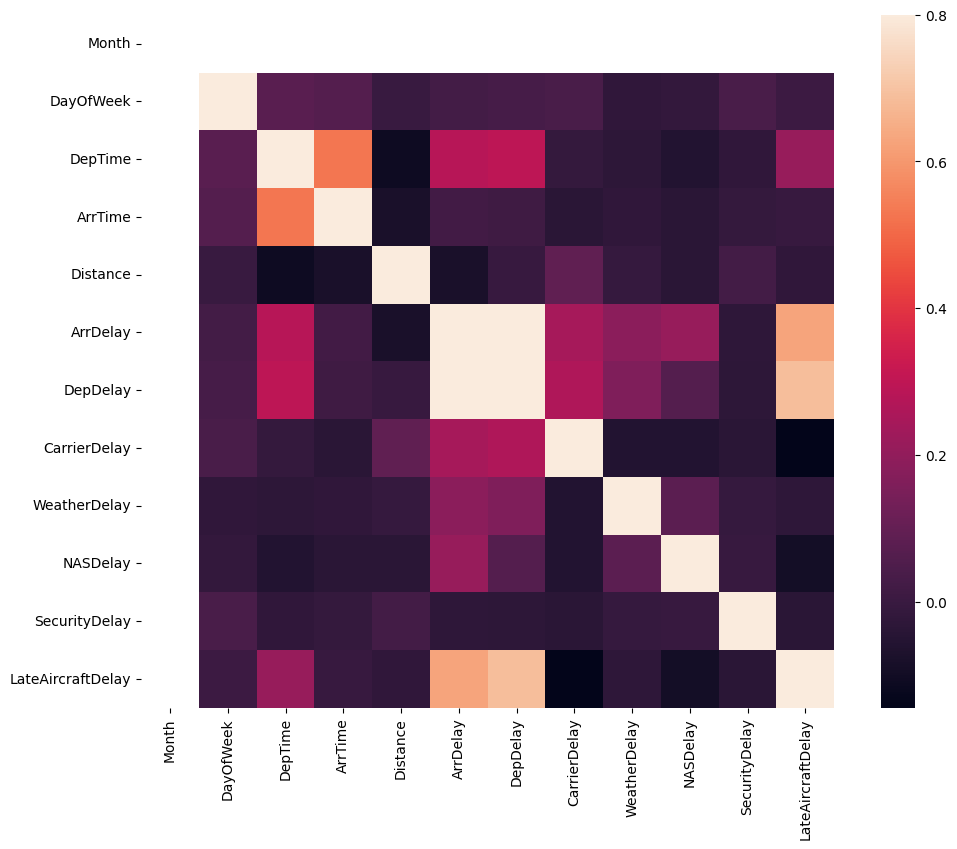

In [115]:
relevant_features = ['Month', 'DayOfWeek', 'DepTime', 'ArrTime', 'Distance',
                     'ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay',
                     'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

corrmat = flight_data[relevant_features].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [127]:
flight_data['DepDate'] = pd.to_datetime(flight_data.Month*100+flight_data.DayOfWeek,format='%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flight_data:
    flight_data.loc[flight_data['ArrDelay'] <= 15, 'Status'] = 0
    flight_data.loc[flight_data['ArrDelay'] >= 15, 'Status'] = 1
    flight_data.loc[flight_data['ArrDelay'] >= 60, 'Status'] = 2
    flight_data.loc[flight_data['Diverted'] == 1, 'Status'] = 3
    flight_data.loc[flight_data['Cancelled'] == 1, 'Status'] = 4



# dropping the unwanted data

flight_data = flight_data.drop(["ArrTime", "CRSArrTime", "ActualElapsedTime", "CRSElapsedTime", "Diverted", "Cancelled", "Distance", "FlightNum"], axis=1)




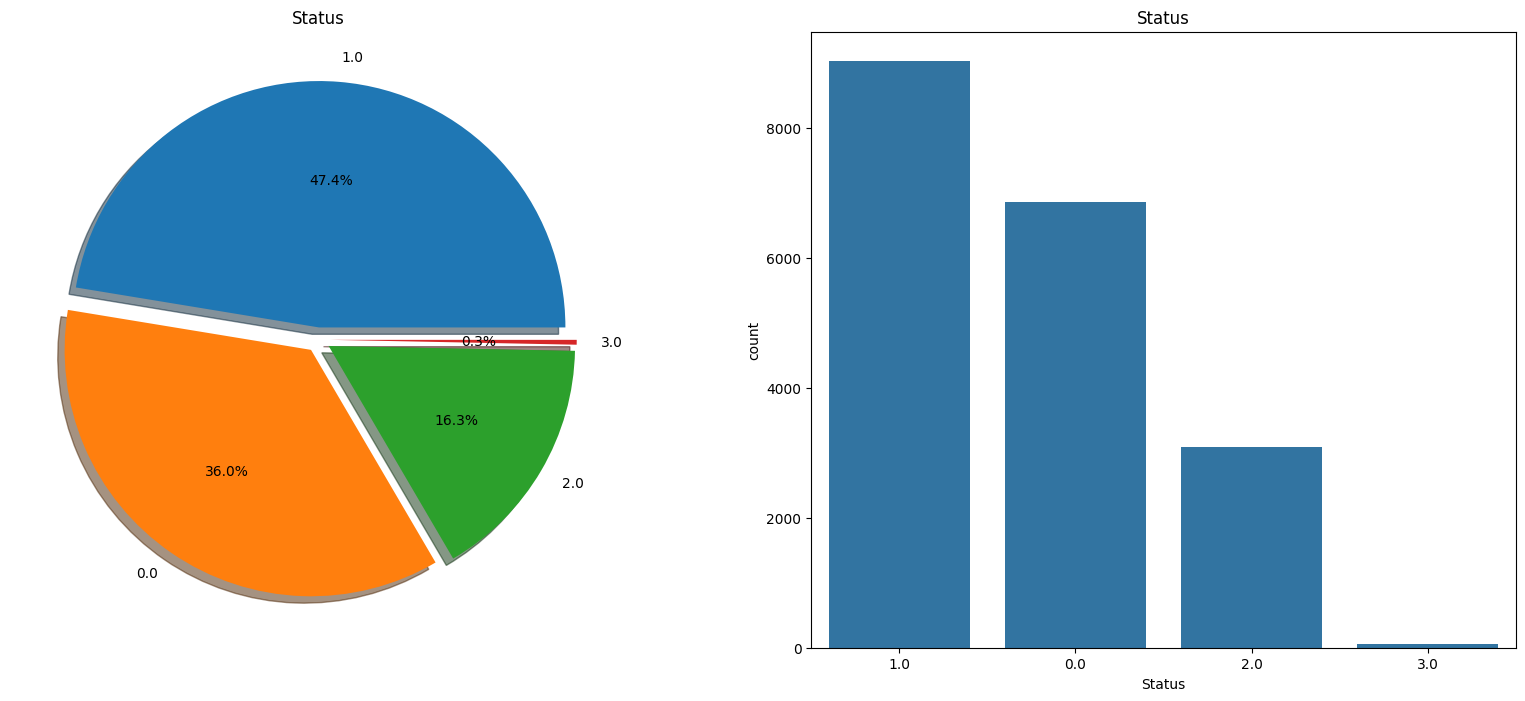

In [133]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

status_counts = flight_data['Status'].value_counts()
explode = [0.05] * len(status_counts)
status_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')

sns.countplot(x='Status', order=status_counts.index, data=flight_data, ax=ax[1])  # Use x parameter
ax[1].set_title('Status')

plt.show()

Cancelled Flight Analysis.

In [150]:
CancFlights = flight_data[flight_data['Status'] == 4]  # Filtering cancelled flights

f, ax = plt.subplots(1, 2, figsize=(20, 8))
cancel_code_counts = CancFlights['CancellationCode'].value_counts()

# Pie chart for cancellation codes
explode = [0.05] * len(cancel_code_counts)
cancel_code_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Cancellation Codes')
ax[0].set_ylabel('')

# Bar chart for cancellation codes
sns.countplot(x='CancellationCode', order=cancel_code_counts.index, data=CancFlights, ax=ax[1])
ax[1].set_title('Cancellation Codes')

plt.show()

KeyError: 'Status'

In [136]:
flight_data['Status'].unique()

array([0., 1., 2., 3.])

In [147]:
flight_data

['Month',
 'DayOfWeek',
 'CRSDepTime',
 'AirTime',
 'ArrDelay',
 'TaxiIn',
 'TaxiOut',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'UniqueCarrier',
 'Origin_ABQ',
 'Origin_ALB',
 'Origin_AMA',
 'Origin_AUS',
 'Origin_BDL',
 'Origin_BHM',
 'Origin_BNA',
 'Origin_BOI',
 'Origin_BUF',
 'Origin_BUR',
 'Origin_BWI',
 'Origin_CLE',
 'Origin_CMH',
 'Origin_CRP',
 'Origin_DAL',
 'Origin_DEN',
 'Origin_DTW',
 'Origin_ELP',
 'Origin_FLL',
 'Origin_GEG',
 'Origin_HOU',
 'Origin_HRL',
 'Origin_IAD',
 'Origin_IND',
 'Origin_ISP',
 'Origin_JAN',
 'Origin_JAX',
 'Origin_LAS',
 'Origin_LAX',
 'Origin_LBB',
 'Origin_LIT',
 'Origin_MAF',
 'Origin_MCI',
 'Origin_MCO',
 'Origin_MDW',
 'Origin_MHT',
 'Origin_MSY',
 'Origin_OAK',
 'Origin_OKC',
 'Origin_OMA',
 'Origin_ONT',
 'Origin_ORF',
 'Origin_PBI',
 'Origin_PDX',
 'Origin_PHL',
 'Origin_PHX',
 'Origin_PIT',
 'Origin_PVD',
 'Origin_RDU',
 'Origin_RNO',
 'Origin_RSW',
 'Origin_SAN',
 'Origin_SAT',
 'Origin_SDF'

In [148]:
flight_data = pd.DataFrame(flight_data)

In [149]:
flight_data

,0
0,Month
1,DayOfWeek
2,CRSDepTime
3,AirTime
4,ArrDelay
...,...
141,CancellationCode
142,UniqueCarrier
143,TotalDelay
144,DepDate


In [151]:
original_csv=pd.read_csv('/content/DelayedFlights.csv')

In [152]:
flight_data=original_csv

In [160]:
flight_data['Cancelled'].unique()


array([ 0., nan])

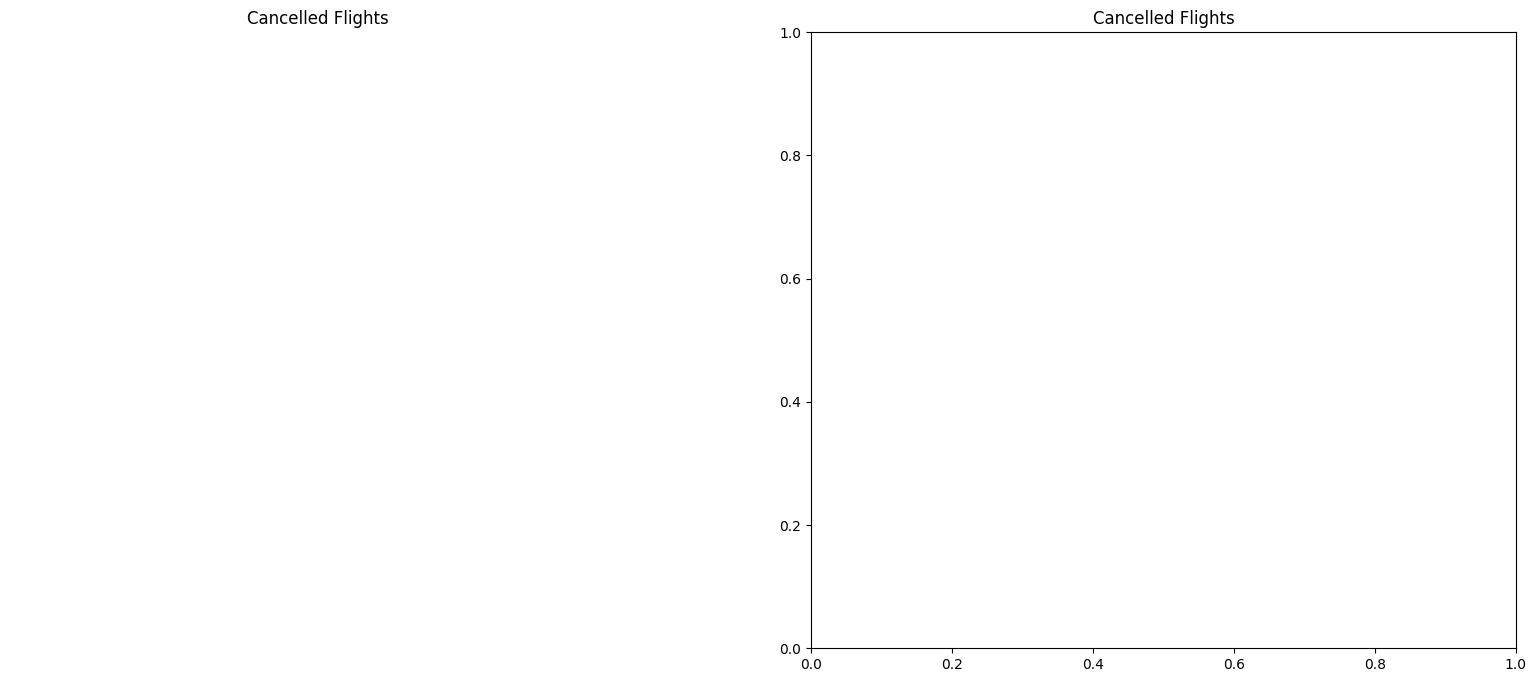

In [158]:
# Filter cancelled flights
cancelled_flights = flight_data[flight_data['Cancelled'] == 1]

# Plotting cancelled flights
f, ax = plt.subplots(1, 2, figsize=(20, 8))
cancel_code_counts = cancelled_flights['Cancelled'].value_counts()

# Pie chart for cancellation codes
explode = [0.05] * len(cancel_code_counts)
cancel_code_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Cancelled Flights')
ax[0].set_ylabel('')

# Bar chart for cancellation codes
sns.countplot(x='Cancelled', order=cancel_code_counts.index, data=cancelled_flights, ax=ax[1])
ax[1].set_title('Cancelled Flights')

plt.show()

In [153]:
flight_data


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8540,18291,2008,1,8,2,2051.0,2040,2152.0,2150,WN,...,4.0,12.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
8541,18294,2008,1,8,2,1539.0,1515,1649.0,1625,WN,...,4.0,15.0,0.0,N,0.0,0.0,0.0,0.0,0.0,24.0
8542,18297,2008,1,8,2,1403.0,1345,1952.0,1950,WN,...,6.0,6.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
8543,18300,2008,1,8,2,2015.0,1955,2114.0,2105,WN,...,3.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [154]:
flight_data.drop(columns=['Unnamed: 0', "Year", "TailNum"],inplace=True)

In [156]:
cancelled_flights = flight_data[flight_data['Cancelled'] == 1]
